Se quiere saber a partir de diversos datos meteorológicos si es un buen día para jugar al tenis.
Utilizando el archivo tenis.csv:

- Obtener los datos
- Entrenar el modelo
- Realizar predicciones y evaluar el modelo

¿Qué resultados da el modelo? ¿Por qué?

¿Qué resultado se obtiene para las siguientes condiciones?

- Outlook: Rain
- Temperature: Cool
- Humidity: Normal
- Wind: Strong


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

## Obtener datos

In [2]:
df = pd.read_csv('tenis.csv')
df.head()

,Outlook,temperature,humidity,wind,playtennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


## Procesar datos

Ya que el modelo solo acepta valores numéricos y el dataset contiene valores nominales es necesario antes del entrenamiento encodear los valores para que tengan un valor numérico.

In [3]:
le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)
df.head()

,Outlook,temperature,humidity,wind,playtennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


### Obtener subconjunto de atributos

In [4]:
data=df.values[:,:4]
data

array([[2, 1, 0, 1],
       [2, 1, 0, 0],
       [0, 1, 0, 1],
       [1, 2, 0, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 0],
       [0, 0, 1, 0],
       [2, 2, 0, 1],
       [2, 0, 1, 1],
       [1, 2, 1, 1],
       [2, 2, 1, 0],
       [0, 2, 0, 0],
       [0, 1, 1, 1],
       [1, 2, 0, 0]])

### Obtener subconjunto de clases

In [5]:
target=df.values[:,4]
target

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

## Generar un conjunto de entrenamiento y uno de prueba

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=89)

## Entrenar modelo

In [16]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

## Obtener Predicciones

In [17]:
y_pred = gnb.predict(X_test)
y_pred

array([0, 1, 0, 1, 0])

## Comprobar las predicciones

Las prediccion son un:  20.0 % certeras


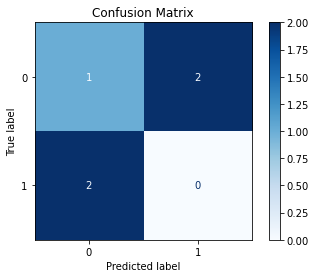

In [18]:
print('Las prediccion son un: ', metrics.accuracy_score(y_test, y_pred)*100, '% certeras')
metrics.confusion_matrix(y_test, y_pred)
disp = metrics.plot_confusion_matrix(gnb, X_test, y_test,cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix')
plt.show()

## ¿Qué resultado se obtiene para las siguientes condiciones?

- Outlook: Rain
- Temperature: Cool
- Humidity: Normal
- Wind: Strong


In [ ]:
gnbaux = GaussianNB()
gnbaux.fit(data, target)

pred = [1,0,1,0]
y_pred = gnbaux.predict([pred])
y_pred

# Conclusion

> El conjunto de datos es demasiado pequeño por lo que no se puede realizar un prediccion certera.
